In [ ]:
# This script contains the following:
# 1. Importing your libraries and data
# 2. Subsetting, wrangling, and cleaning time-series data
# 3. Time series analysis: decomposition
# 4. Testing for stationarity
# 5. Stationarizing the World Bank Data

In [ ]:
# 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Define path
path = r'C:\\Users\\nakarton\\Downloads\\NakartonDataFiles\\Life Expectancy 2000-2020'

In [3]:
path

'C:\\\\Users\\\\nakarton\\\\Downloads\\\\NakartonDataFiles\\\\Life Expectancy 2000-2020'

In [5]:
# Import dataset
df_life_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','life_expectancy_clean.csv'))

In [6]:
df_life_clean

,Unnamed: 0,Country,Year,Continent,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption,Population category
0,0,Albania,2000,Europe,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431,High Population
1,1,Albania,2001,Europe,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995,High Population
2,2,Albania,2002,Europe,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697,High Population
3,3,Albania,2003,Europe,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830,High Population
4,4,Albania,2004,Europe,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617,High Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,Zimbabwe,2011,Africa,52.896,12894323,0.884886,8.081738,8.400000,26.876148,67.016076,10.8,2.05000,High Population
1900,1900,Zimbabwe,2012,Africa,55.032,13115149,0.915735,6.918354,12.000000,26.533231,66.491185,11.1,2.07000,High Population
1901,1901,Zimbabwe,2013,Africa,56.897,13350378,0.919824,7.110148,15.500000,26.188786,65.966474,11.3,2.12000,High Population
1902,1902,Zimbabwe,2014,Africa,58.410,13586710,0.889104,8.133525,16.364740,25.832157,65.454108,11.6,2.23000,High Population


In [ ]:
# 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
# Calculate the mean of life expectancy grouped by year:

df_mean_life= pd.DataFrame(df_life_clean.groupby('Year')['life_expect'].mean())

In [8]:
df_sub= df_mean_life.reset_index()

In [9]:
# Turn year column to datetime dtype
df_sub['year'] = pd.to_datetime(df_sub['Year'], format='%Y') 

In [10]:
# Set year column as index
df_sub = df_sub.set_index('year') 
df_sub.drop(['Year'], axis=1, inplace=True) 
df_sub.head()

,life_expect
year,
2000-01-01,68.436453
2001-01-01,68.712396
2002-01-01,68.938217
2003-01-01,69.194394
2004-01-01,69.565919


In [ ]:
# 3. Time series analysis: decomposition

In [11]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [12]:
from pylab import rcParams 
# This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

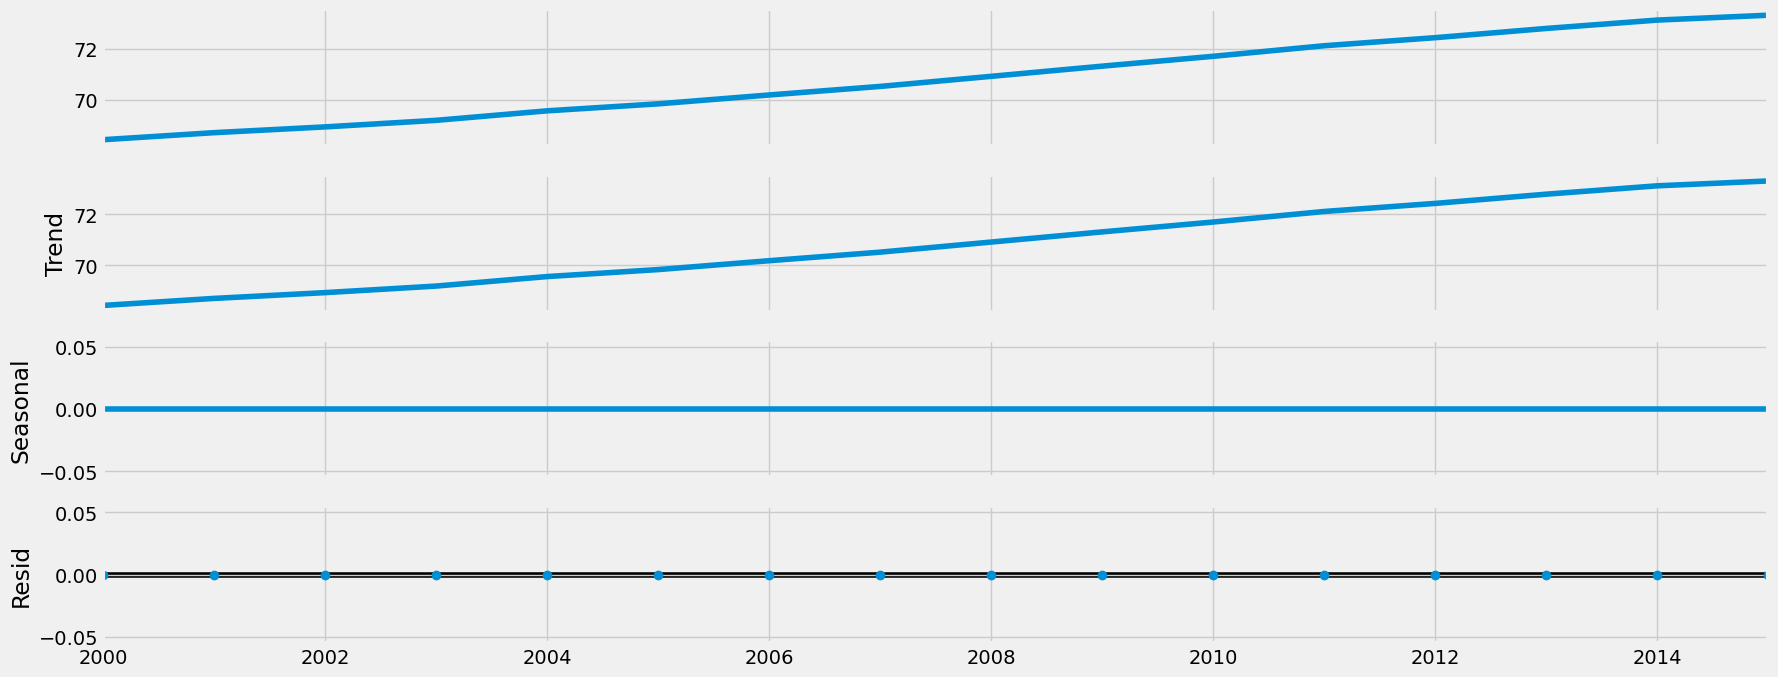

In [13]:
# Plot the separate components
decomposition.plot()
plt.show()

In [ ]:
# 4. Testing for stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

In [16]:
# define the function
def dickey_fuller(timeseries): 
    # Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test on the time series with previously defined function
dickey_fuller(df_sub['life_expect'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.480540
p-value                         0.120281
Number of Lags Used             5.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


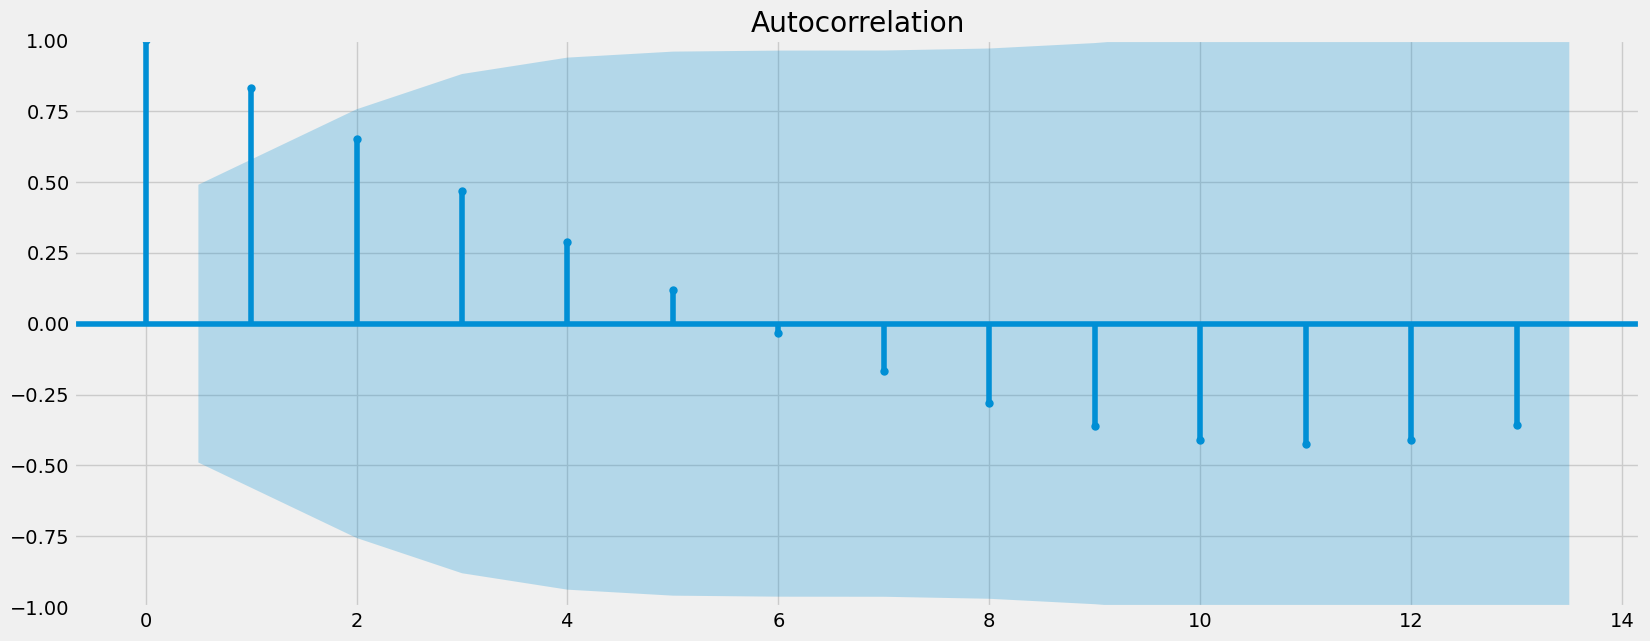

In [18]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots.
plot_acf(df_sub)
plt.show()

In [ ]:
# 5. Stationarizing the World Bank Data

In [19]:
df_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [21]:
df_diff.dropna(inplace = True) 
# Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [22]:
df_diff.head()

,life_expect
year,
2001-01-01,0.275943
2002-01-01,0.225821
2003-01-01,0.256177
2004-01-01,0.371525
2005-01-01,0.274032


In [23]:
df_diff.columns

Index(['life_expect'], dtype='object')

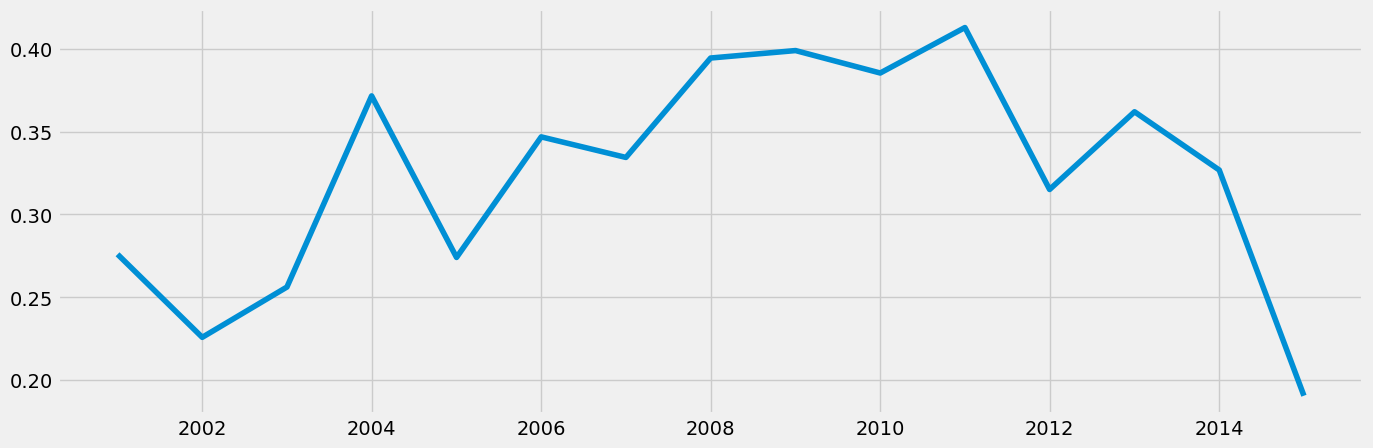

In [24]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [25]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.812171
p-value                         0.374436
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


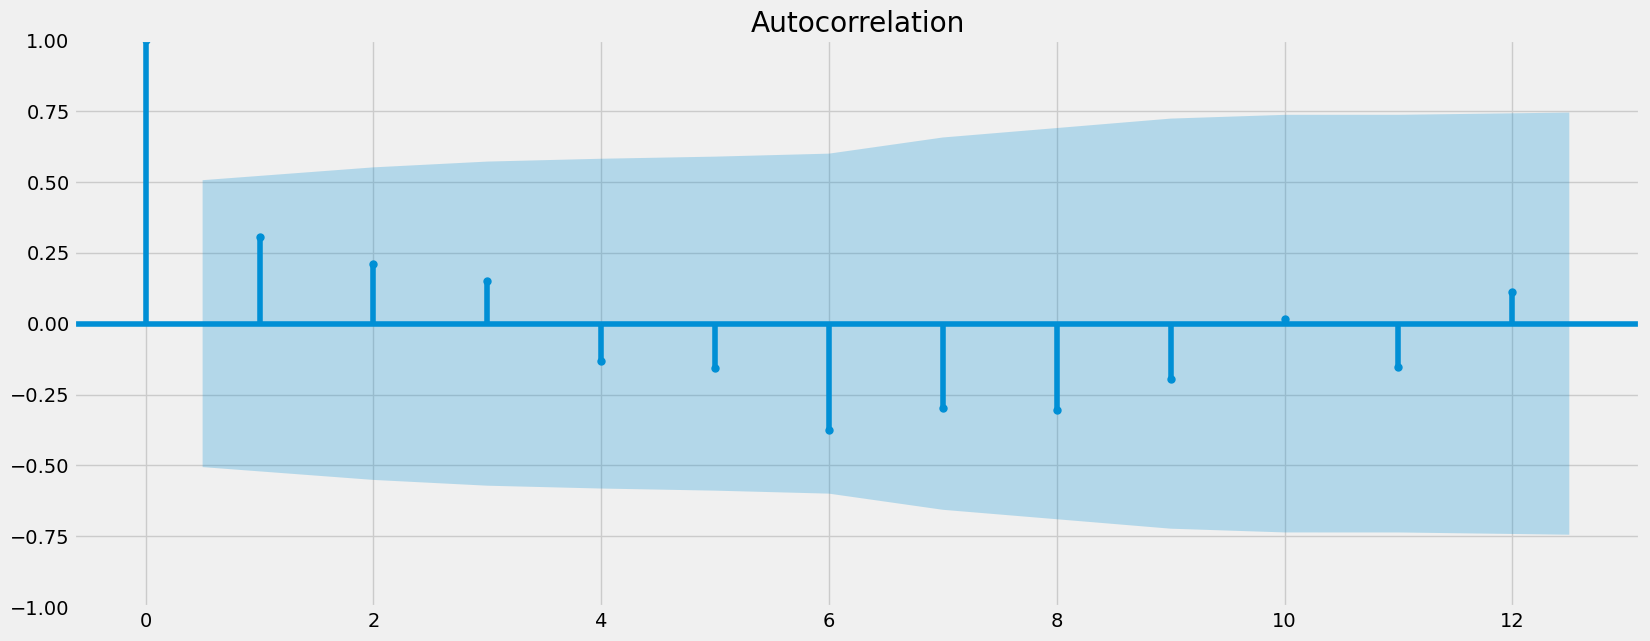

In [26]:
plot_acf(df_diff)
plt.show()